In [1]:
import numpy as np
import math

In [2]:
def tanh(x):
    return np.tanh(x)
def softmax(x):
    exp=np.exp(x-x.max()) #防止指数爆炸
    return exp/exp.sum()

In [3]:
dimensions=[28*28,10]
activation=[tanh,softmax]
distribution=[
    {'b':[0,0]},
    {'b':[0,0],'w':[-math.sqrt(6/(dimensions[0]+dimensions[1])),math.sqrt(6/(dimensions[0]+dimensions[1]))]},
]

In [4]:
tanh(0.1)

0.09966799462495582

In [5]:
softmax(np.array([0,1,2,3,4,5,6,7,8,9]))

array([7.80134161e-05, 2.12062451e-04, 5.76445508e-04, 1.56694135e-03,
       4.25938820e-03, 1.15782175e-02, 3.14728583e-02, 8.55520989e-02,
       2.32554716e-01, 6.32149258e-01])

In [6]:
def init_parameters_b(layer):
    dist=distribution[layer]['b']
    return np.random.rand(dimensions[layer])*(dist[1]-dist[0])+dist[0]
def init_parameters_w(layer):
    dist=distribution[layer]['w']
    return np.random.rand(dimensions[layer-1],dimensions[layer])*(dist[1]-dist[0])+dist[0]

def init_parameters():
    parameters=[]
    for i in range(len(distribution)):
        layer_parameters={}
        for j in distribution[i].keys():
            if j=='b':
                layer_parameters['b']=init_parameters_b(i)
                continue
            if j=='w':
                layer_parameters['w']=init_parameters_w(i)
                continue
        parameters.append(layer_parameters)
    return parameters

初始化
随机
遍历
找到b和w值

In [7]:
init_parameters_b(0).shape   #784个0

(784,)

In [8]:
init_parameters_w(1).shape

(784, 10)

In [9]:
init_parameters()

[{'b': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [10]:
parameters=init_parameters()

# 思路

l0=A*(Data+b0)
l1=A'*(l0*w1+b1)

A->activation[0] (tanh)
A'->activation[1] (softmax)

data=img
b0=parameters[0]['b']
b1=parameters[1]['b']
w1=parameters[1]['w']
    

In [11]:
def predict(img,parameters):
    l0_in=img+parameters[0]['b']
    l0_out=activation[0](l0_in)
    l1_in=np.dot(l0_out,parameters[1]['w'])+parameters[1]['b']
    l1_out=activation[1](l1_in)
    return l1_out

In [12]:
predict(np.random.rand(784),parameters).argmax()

7

## 至此，一个神经网络框架就搭建完成了


In [13]:
from pathlib import Path

In [14]:
dataset_path=Path('./MNIST')
train_img_path=dataset_path/'train-images-idx3-ubyte'
train_lab_path=dataset_path/'train-labels-idx1-ubyte'
test_img_path=dataset_path/'t10k-images-idx3-ubyte'
test_lab_path=dataset_path/'t10k-labels-idx1-ubyte'

In [15]:
import struct

In [16]:
train_num=50000    #训练集
valid_num=10000    #加一个验证集
test_num=10000     #测试集

with open(train_img_path,'rb') as op:
    struct.unpack('>4i',op.read(16))
    temp_img=np.fromfile(op,dtype=np.uint8).reshape(-1,28*28)
    train_img=temp_img[:train_num]
    valid_img=temp_img[train_num:]
with open(test_img_path,'rb') as op:
    struct.unpack('>4i',op.read(16))
    test_img=np.fromfile(op,dtype=np.uint8).reshape(-1,28*28)
    
with open(train_lab_path,'rb') as op:
    struct.unpack('>2i',op.read(8))
    temp_lab=np.fromfile(op,dtype=np.uint8)
    train_lab=temp_lab[:train_num]
    valid_lab=temp_lab[train_num:]
with open(test_lab_path,'rb') as op:
    struct.unpack('>2i',op.read(8))
    test_lab=np.fromfile(op,dtype=np.uint8)

In [17]:
import matplotlib.pyplot as plt

In [18]:
def show_train(index):
    plt.imshow(train_img[index].reshape(28,28),cmap='gray')
    print('label:{}'.format(train_lab[index]))
    
def show_valid(index):
    plt.imshow(valid_img[index].reshape(28,28),cmap='gray')
    print('label:{}'.format(valid_lab[index]))
    
def show_test(index):
    plt.imshow(test_img[index].reshape(28,28),cmap='gray')
    print('label:{}'.format(test_lab[index]))

label:6


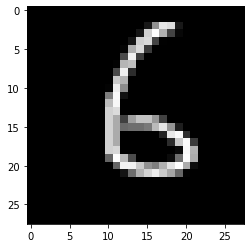

In [19]:
show_train(np.random.randint(train_num))

label:1


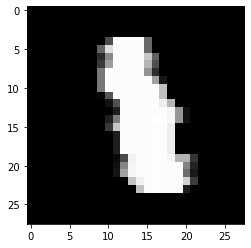

In [20]:
show_valid(np.random.randint(valid_num))

label:8


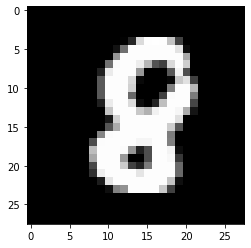

In [22]:
show_test(np.random.randint(test_num))